Masukkan judul lagu yang ingin dicari (atau ketik 'exit' untuk keluar): apt.

Judul lagu 'apt.' ditemukan di dataset.
Waktu eksekusi Rekursif: 0.021474 detik
Waktu eksekusi Iteratif: 0.000127 detik
Masukkan judul lagu yang ingin dicari (atau ketik 'exit' untuk keluar): Defenceless

Judul lagu 'Defenceless' ditemukan di dataset.
Waktu eksekusi Rekursif: 0.048036 detik
Waktu eksekusi Iteratif: 0.000280 detik
Masukkan judul lagu yang ingin dicari (atau ketik 'exit' untuk keluar): Live While We're Young

Judul lagu 'Live While We're Young' ditemukan di dataset.
Waktu eksekusi Rekursif: 0.108404 detik
Waktu eksekusi Iteratif: 0.000554 detik
Masukkan judul lagu yang ingin dicari (atau ketik 'exit' untuk keluar): Untungnya, Hidup Harus Terus Berjalan

Judul lagu 'Untungnya, Hidup Harus Terus Berjalan' ditemukan di dataset.
Waktu eksekusi Rekursif: 0.313819 detik
Waktu eksekusi Iteratif: 0.001728 detik
Masukkan judul lagu yang ingin dicari (atau ketik 'exit' untuk keluar): exit

=== Semua Hasi

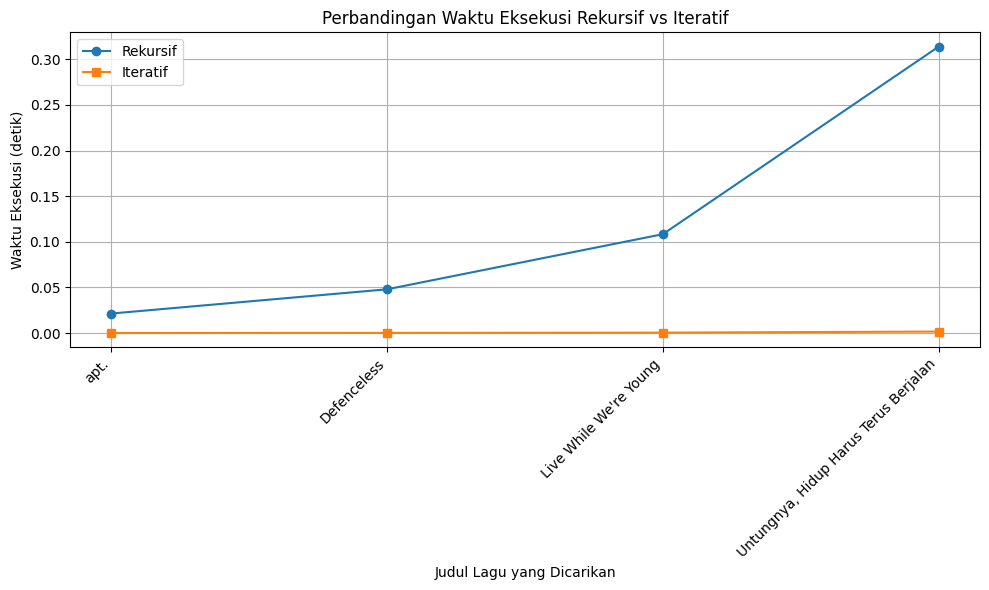

In [6]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

data = pd.read_csv("Datasetsong.csv")
judul_lagu = data['Title'].tolist()

def tambah_beban_komputasi(panjang_cari):
    for _ in range(panjang_cari * 1000):
        pass

def cari_lagu_rekursif(judul_lagu, judul_cari, panjang_cari, hasil=None):
    tambah_beban_komputasi(len(judul_cari))
    if hasil is None:
        hasil = []
    if not judul_lagu:
        return hasil
    if len(judul_lagu[0]) == panjang_cari and judul_lagu[0].lower() == judul_cari.lower():
        hasil.append(judul_lagu[0])
    return cari_lagu_rekursif(judul_lagu[1:], judul_cari, panjang_cari, hasil)

# Fungsi iteratif untuk mencari judul lagu
def cari_lagu_iteratif(judul_lagu, judul_cari, panjang_cari):
    tambah_beban_komputasi(len(judul_cari))
    hasil = []
    for judul in judul_lagu:
        if len(judul) == panjang_cari and judul.lower() == judul_cari.lower():
            hasil.append(judul)
    return hasil

# Fungsi untuk mengukur waktu eksekusi
def ukur_waktu(fungsi, *args):
    mulai = time.time()
    hasil = fungsi(*args)
    selesai = time.time()
    return hasil, selesai - mulai

# Inisialisasi list untuk menyimpan waktu eksekusi berdasarkan panjang input
rekursif_times = []
iteratif_times = []
judul_yang_dicari = []

# Loop untuk pencarian lagu dan pencatatan waktu
while True:
    judul_cari = input("Masukkan judul lagu yang ingin dicari (atau ketik 'exit' untuk keluar): ").strip()

    if judul_cari.lower() == 'exit':
        break  # Keluar dari loop jika user mengetik 'exit'

    panjang_cari = len(judul_cari)

    # Mengukur waktu eksekusi untuk pencarian judul lagu
    _, waktu_rekursif = ukur_waktu(cari_lagu_rekursif, judul_lagu, judul_cari, panjang_cari)
    _, waktu_iteratif = ukur_waktu(cari_lagu_iteratif, judul_lagu, judul_cari, panjang_cari)

    # Menambahkan hasil ke list jika lagu ditemukan
    if judul_cari.lower() in [judul.lower() for judul in judul_lagu]:
        rekursif_times.append(waktu_rekursif)
        iteratif_times.append(waktu_iteratif)
        judul_yang_dicari.append(judul_cari)
        print(f"\nJudul lagu '{judul_cari}' ditemukan di dataset.")
    else:
        print(f"\nJudul lagu '{judul_cari}' tidak ditemukan di dataset.")

    # Menampilkan waktu eksekusi untuk rekursif dan iteratif
    print(f"Waktu eksekusi Rekursif: {waktu_rekursif:.6f} detik")
    print(f"Waktu eksekusi Iteratif: {waktu_iteratif:.6f} detik")

# Menampilkan semua hasil waktu eksekusi dalam tabel dengan garis
print("\n=== Semua Hasil Waktu Eksekusi ===")
data_tabel = pd.DataFrame({
    'Judul Lagu': judul_yang_dicari,
    'Waktu Rekursif (detik)': rekursif_times,
    'Waktu Iteratif (detik)': iteratif_times
})

# Menampilkan tabel dengan garis menggunakan tabulate
print(tabulate(data_tabel, headers='keys', tablefmt='grid', showindex=False))

# Menyiapkan plot untuk grafik setelah loop selesai
plt.figure(figsize=(10, 6))
plt.title("Perbandingan Waktu Eksekusi Rekursif vs Iteratif")
plt.xlabel("Judul Lagu yang Dicarikan")
plt.ylabel("Waktu Eksekusi (detik)")
plt.grid(True)

# Update grafik dengan semua data yang dikumpulkan
plt.plot(judul_yang_dicari, rekursif_times, label="Rekursif", marker="o")
plt.plot(judul_yang_dicari, iteratif_times, label="Iteratif", marker="s")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()
